In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
import tensorflow as tf


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_training shape' , x_train.shape)
print('Y_training shape' , y_train.shape)
print('X_testing shape' , x_test.shape)
print('Y_testing shape' , y_test.shape)

X_training shape (60000, 28, 28)
Y_training shape (60000,)
X_testing shape (10000, 28, 28)
Y_testing shape (10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


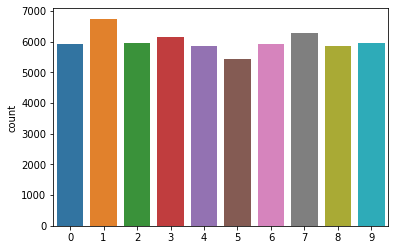

In [ ]:
sns.countplot(y_train)

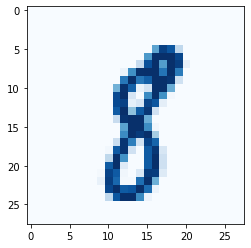

In [ ]:
plt.imshow(x_train[300] , cmap="Blues")
plt.show()

In [ ]:
input_shape=(28,28,1)

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5

In [ ]:
model = keras.Sequential(
    [
     keras.Input(input_shape),
     layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Dropout(0.5),
     layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
     layers.MaxPooling2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes , activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,batch_size=batch_size , epochs=epochs , validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 48s 111ms/step - loss: 0.4760 - accuracy: 0.8487 - val_loss: 0.1090 - val_accuracy: 0.9713
Epoch 2/5
422/422 [==============================] - 40s 95ms/step - loss: 0.1665 - accuracy: 0.9486 - val_loss: 0.0771 - val_accuracy: 0.9792
Epoch 3/5
422/422 [==============================] - 41s 97ms/step - loss: 0.1295 - accuracy: 0.9597 - val_loss: 0.0598 - val_accuracy: 0.9833
Epoch 4/5
422/422 [==============================] - 41s 96ms/step - loss: 0.1075 - accuracy: 0.9661 - val_loss: 0.0521 - val_accuracy: 0.9867
Epoch 5/5
422/422 [==============================] - 40s 95ms/step - loss: 0.0948 - accuracy: 0.9704 - val_loss: 0.0465 - val_accuracy: 0.9868


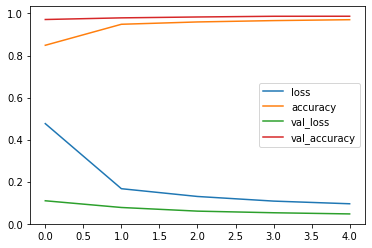

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0442 - accuracy: 0.9870


[0.04424906149506569, 0.9869999885559082]

In [ ]:
model = keras.Sequential(
    [
     keras.Input(input_shape),
     layers.Conv2D(1,kernel_size=(6,6),activation="relu"),
     layers.MaxPooling2D(pool_size=(6,6)),
     layers.Flatten(),
     layers.Dense(num_classes , activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 23, 23, 1)         37        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 1)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                100       
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="adam" , metrics=["accuracy"])

In [ ]:
history = model.fit(x_train,y_train,batch_size=batch_size , epochs = epochs , validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 15s 35ms/step - loss: 2.0564 - accuracy: 0.3391 - val_loss: 1.6993 - val_accuracy: 0.4637
Epoch 2/5
422/422 [==============================] - 14s 34ms/step - loss: 1.4555 - accuracy: 0.5272 - val_loss: 1.2706 - val_accuracy: 0.5828
Epoch 3/5
422/422 [==============================] - 14s 34ms/step - loss: 1.2438 - accuracy: 0.5901 - val_loss: 1.1637 - val_accuracy: 0.6167
Epoch 4/5
422/422 [==============================] - 14s 34ms/step - loss: 1.1861 - accuracy: 0.6077 - val_loss: 1.1267 - val_accuracy: 0.6285
Epoch 5/5
422/422 [==============================] - 14s 34ms/step - loss: 1.1603 - accuracy: 0.6188 - val_loss: 1.1071 - val_accuracy: 0.6335


In [ ]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = np.argmax(y_pred , axis = 1)

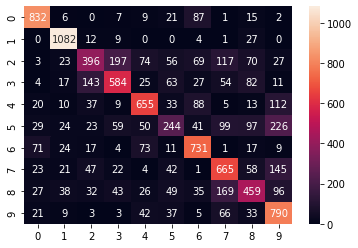

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred) , annot=True , fmt="d")

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

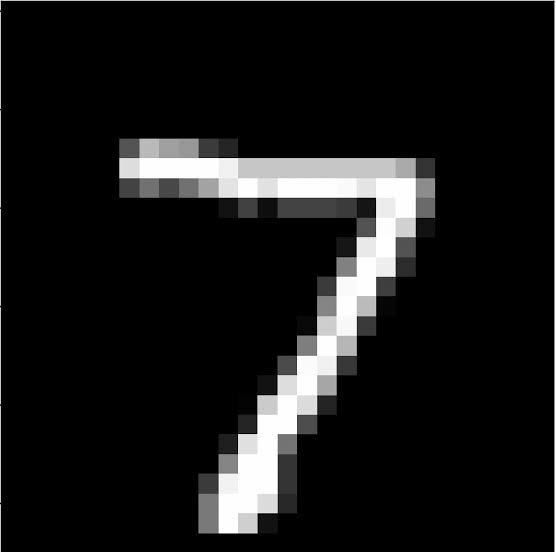

In [ ]:
img = cv.imread("/content/drive/MyDrive/ML-Lab/mnist.jpeg")
cv2_imshow(img)

In [ ]:
img.shape

(552, 556, 3)

In [ ]:
gray = cv.cvtColor(img , cv.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(552, 556)

In [ ]:
img_rs = cv.resize(gray , (28,28))

In [ ]:
img_rs.shape

(28, 28)

In [ ]:
cv2_imshow(img_rs)

In [ ]:
img_rs = np.expand_dims(img_rs,0)

In [ ]:
img_rs.shape

(1, 28, 28)

In [ ]:
img_rs = np.expand_dims(img_rs,-1)

In [ ]:
img_rs.shape

(1, 28, 28, 1)

In [ ]:
num = model.predict(img_rs)

In [ ]:
rs = [0,1,2,3,4,5,6,7,8,9]

In [ ]:
result = rs[np.argmax(num)]

In [ ]:
result

7

In [ ]:
model.save("/content/drive/MyDrive/ML-Lab/mnist.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 23, 23, 1)         37        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 1)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                100       
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = load_model("/content/drive/MyDrive/ML-Lab/mnist.h5")